<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/HW6/dtw_MTLSA25_UBhagat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will need a few unusual libraries

In [2]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=2fc4a0a1bb636d65ef1c84f5eb2709ede0580fc9c18a3461b3e487824d4feb45
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 26.6 MB/s eta 0:00:00


In [3]:
#system options you will need
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
np.set_printoptions(threshold=sys.maxsize)
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/MyDrive/MLTSA25

/content/gdrive/MyDrive/MLTSA25


In [7]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [8]:
cd data

/content/gdrive/MyDrive/MLTSA25/data


In [9]:
ls

Jarvisd_template.wav  Tofftlu_template.wav  Tontt_template.wav
Jarvise_template.wav  Tontld_template.wav   Tonttu_template.wav
Jarvish_template.wav  Tontle_template.wav   Ttatd_template.wav
Jarvis_template.wav   Tontlh_template.wav   Ttate_template.wav
Jarvisu_template.wav  Tontl_template.wav    Ttath_template.wav
Tofftld_template.wav  Tontlu_template.wav   Ttat_template.wav
Tofftle_template.wav  Tonttd_template.wav   Ttatu_template.wav
Tofftlh_template.wav  Tontte_template.wav
Tofftl_template.wav   Tontth_template.wav


# I am going to download data from someone's github repo
One of you asked me earlier in the semester how one would so this. We will use data from Salika Dave, a student at Mumbai tech who stored some soundbites on her GitHub repo.

In [10]:
from github import Github
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()



In [ ]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")


In [ ]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [ ]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [11]:
%ls

Jarvisd_template.wav  Tofftlu_template.wav  Tontt_template.wav
Jarvise_template.wav  Tontld_template.wav   Tonttu_template.wav
Jarvish_template.wav  Tontle_template.wav   Ttatd_template.wav
Jarvis_template.wav   Tontlh_template.wav   Ttate_template.wav
Jarvisu_template.wav  Tontl_template.wav    Ttath_template.wav
Tofftld_template.wav  Tontlu_template.wav   Ttat_template.wav
Tofftle_template.wav  Tonttd_template.wav   Ttatu_template.wav
Tofftlh_template.wav  Tontte_template.wav
Tofftl_template.wav   Tontth_template.wav


In [12]:
cd ../

/content/gdrive/MyDrive/MLTSA25


In [13]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (pl.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (pl.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (pl.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (pl.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (pl.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [14]:
for k,v in colors.items():
        print(k,v)

Jarvis ((np.float64(0.267004), np.float64(0.004874), np.float64(0.329415), np.float64(1.0)), 'Jarvis')
Tofftl ((np.float64(0.229739), np.float64(0.322361), np.float64(0.545706), np.float64(1.0)), 'Turn off the lights')
Tontl ((np.float64(0.127568), np.float64(0.566949), np.float64(0.550556), np.float64(1.0)), 'Turn on the lights')
Tontt ((np.float64(0.369214), np.float64(0.788888), np.float64(0.382914), np.float64(1.0)), 'Turn on the TV')
Ttat ((np.float64(0.993248), np.float64(0.906157), np.float64(0.143936), np.float64(1.0)), 'Turn the air temperature')


#Data Exploration and Visualization
## plot the sound bites
the sound bites are read in as numpy array by the ```scipy.io.wavfile``` module. The dataset is comprised of 5 soundbites for each of 5 sentences. The word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature". Each sound bite, for each sentence, is read by a different person, with different accents, genders, and background noise. if you install the pydub  module and run the notebook locally you can hear each soundbite in this loop (wont play on google colab).

In [15]:
print("Filenames:", filenames)

Filenames: ['data/Jarvis_template.wav' 'data/Jarvisd_template.wav'
 'data/Jarvise_template.wav' 'data/Jarvish_template.wav'
 'data/Jarvisu_template.wav' 'data/Tofftl_template.wav'
 'data/Tofftld_template.wav' 'data/Tofftle_template.wav'
 'data/Tofftlh_template.wav' 'data/Tofftlu_template.wav'
 'data/Tontl_template.wav' 'data/Tontld_template.wav'
 'data/Tontle_template.wav' 'data/Tontlh_template.wav'
 'data/Tontlu_template.wav' 'data/Tontt_template.wav'
 'data/Tonttd_template.wav' 'data/Tontte_template.wav'
 'data/Tontth_template.wav' 'data/Tonttu_template.wav'
 'data/Ttat_template.wav' 'data/Ttatd_template.wav'
 'data/Ttate_template.wav' 'data/Ttath_template.wav'
 'data/Ttatu_template.wav']


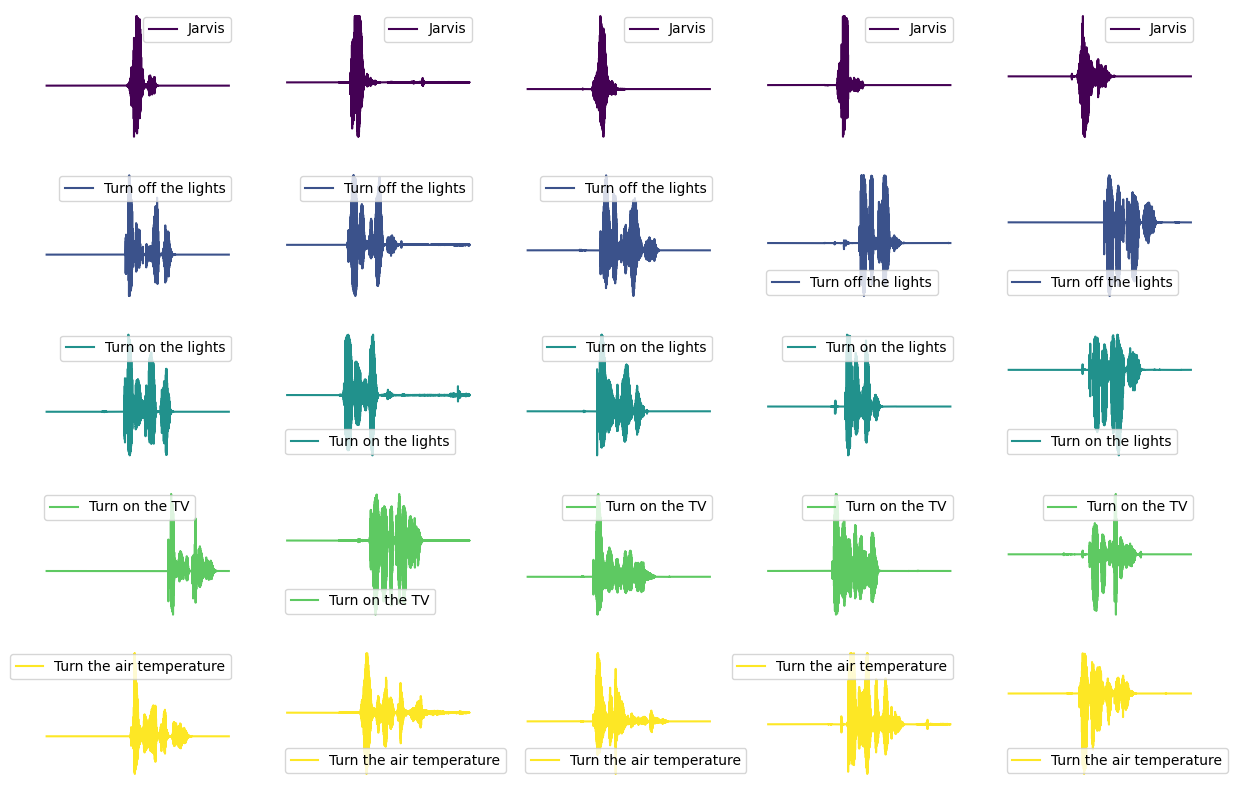

In [16]:
fig = pl.figure(figsize(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f:
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')
    pl.legend()
pl.show()

Figure 1: 25 sound bites read in as arrays from the original *.wav* file. The arrays represnet sound intensity *vs* time, but the spectral sound information (frequency) is lost.  These are therefore simplified representations of the original data.
Each of 5 sentences is recorded as spoken by a different person in a different environment: the word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature".  In the above plot, each row is a different sentence (also plotted with a different color). The content of the soundbite is written on top of the wave plot.  At a glance, the soundbites show some similarities within the same sentence, mostly in the duration of the speech. We also note that the starting point of the speech is not homogeneous within the recorded segment.

The following analysis could be implemented in the full spectral-features dataset, but the current 1-dimensional representation of the data alows for a simpler implementation of the methods.

In [ ]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## downsampling the large arrays
each sound bit is stored in an array of 64000 elements. To work effectively we will downsample them by a factor of 10. Occasionally I will downsample it further.

Since classifying these sound mites will require generating distance arrays, we want to know ahead of time what we are getting ourelves into. We are working with foating point numbers
- 64 bits per number
We want to build 2D arrays that are NxN sized where N is the length of the soundbite array (64,000)
- 64000x64000
- 1 GB is 8e9 bit
## *task 1: Print out the amount of memory in Gigabytes (or Megabytes where needed) that would take to create a single distance matrix, a distance matrix subsampling the array by 10, by 8, and by 100*

In [ ]:
print("calculating a distance matrix for the full files would requires " +
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " +
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [ ]:
steps = 10

In [ ]:
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [ ]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

inspect the sound bites: the original array and the downsampled, normalized ones.

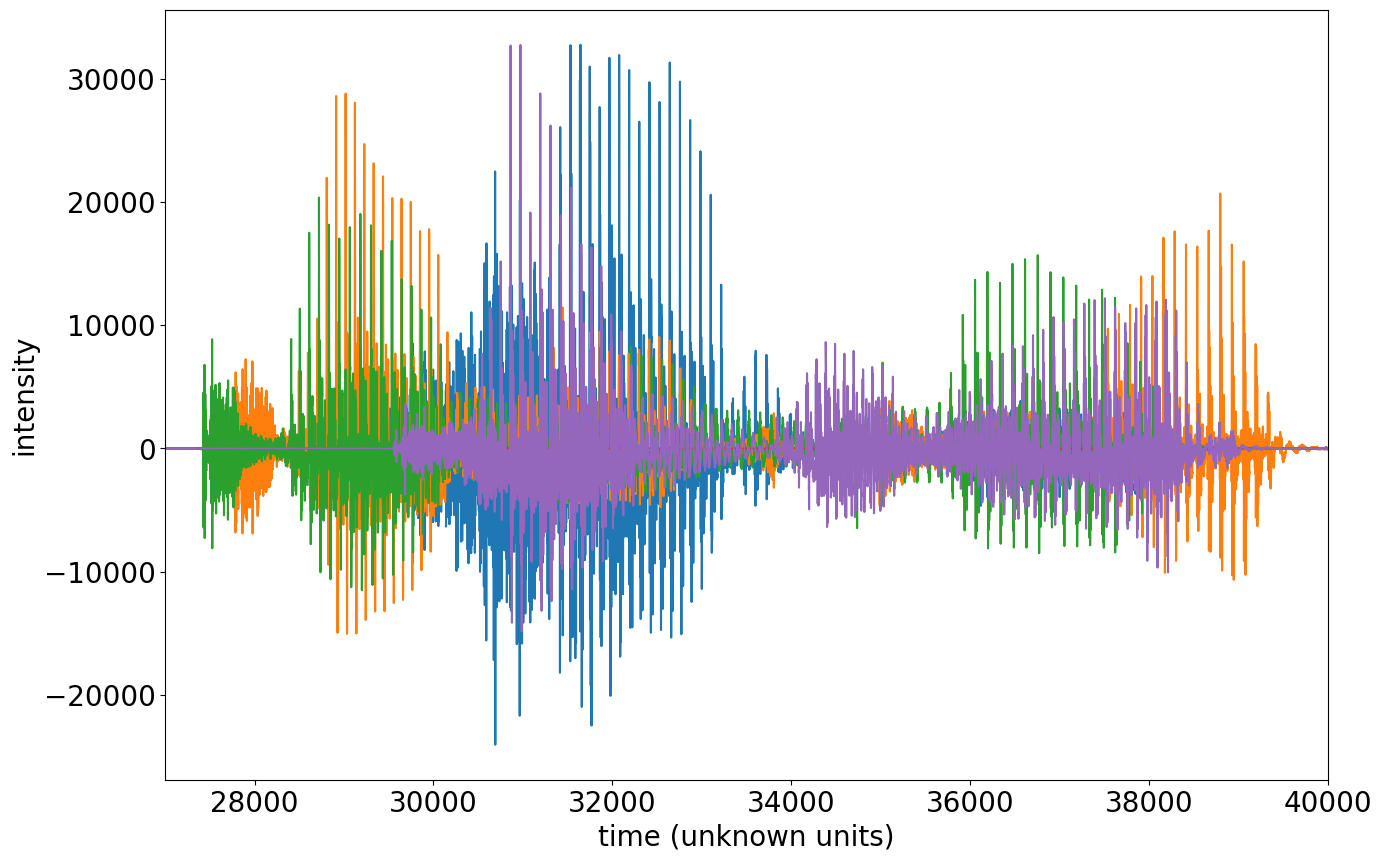

In [ ]:
pl.rcParams['font.size'] = 20
pl.plot(wavfiles[0])
pl.plot(wavfiles[5])
pl.plot(wavfiles[10])
pl.plot(wavfiles[15])
pl.plot(wavfiles[20])
pl.xlim(27000, 40000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);

Figure 2: the first sound bite for each sentene, the core portion of the array only is shown, elements 27000-40000 of 64000.


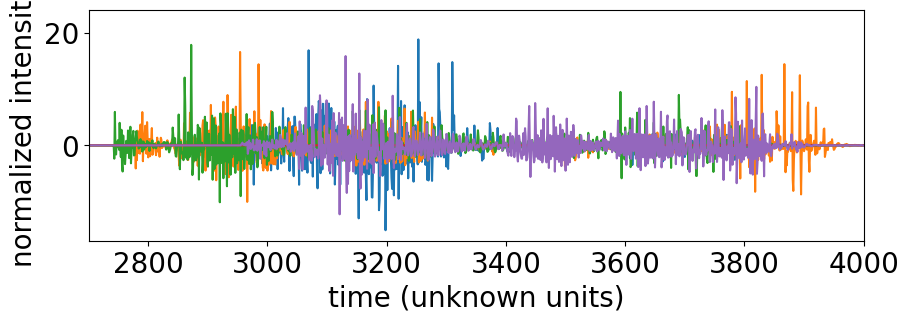

In [ ]:
pl.rcParams['font.size'] = 20
'''
pl.plot(X[1])
pl.plot(X[10])
'''
pl.plot(X[0])
pl.plot(X[5])
pl.plot(X[10])
pl.plot(X[15])
pl.plot(X[20])

pl.xlim(2700, 4000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("normalized intensity", fontsize=20);

Figure 3: Same as figure 2 but for the standardized arrays, downsampled by a factor 10 by selecting every 10th datum.

# Calculating distance between sound bites
# Naive distsances between two arrays
Plot the distance between each pair of the 25 sound bites. The distance matrix should be 25x25 and each entry should be a naive distance calculated between the 2 arrays.

The naive distance can be the sum of the difference between entries of the array at the same time stamp, i.e. along the diagonal, or its absolute value, which would correspond to the L1 metric

In [ ]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

to save time I am resampling again by the same step. This is equivalent to resampling by 100

## *task 1: explain the figures*

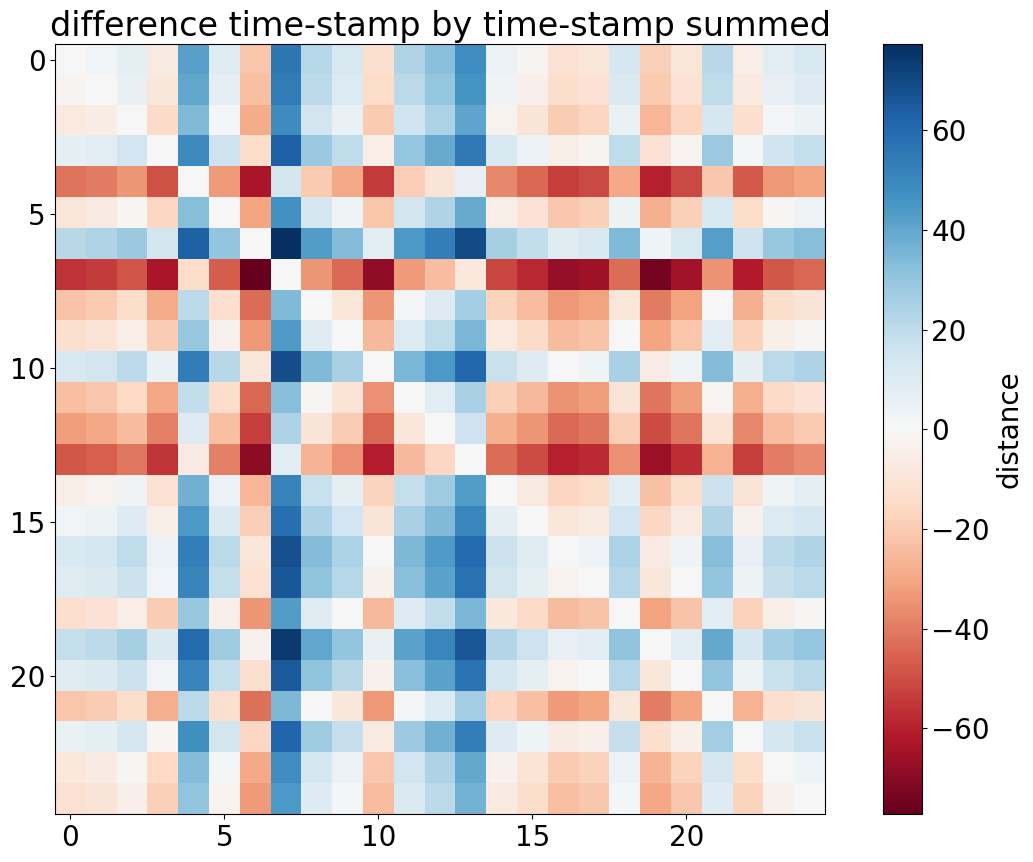

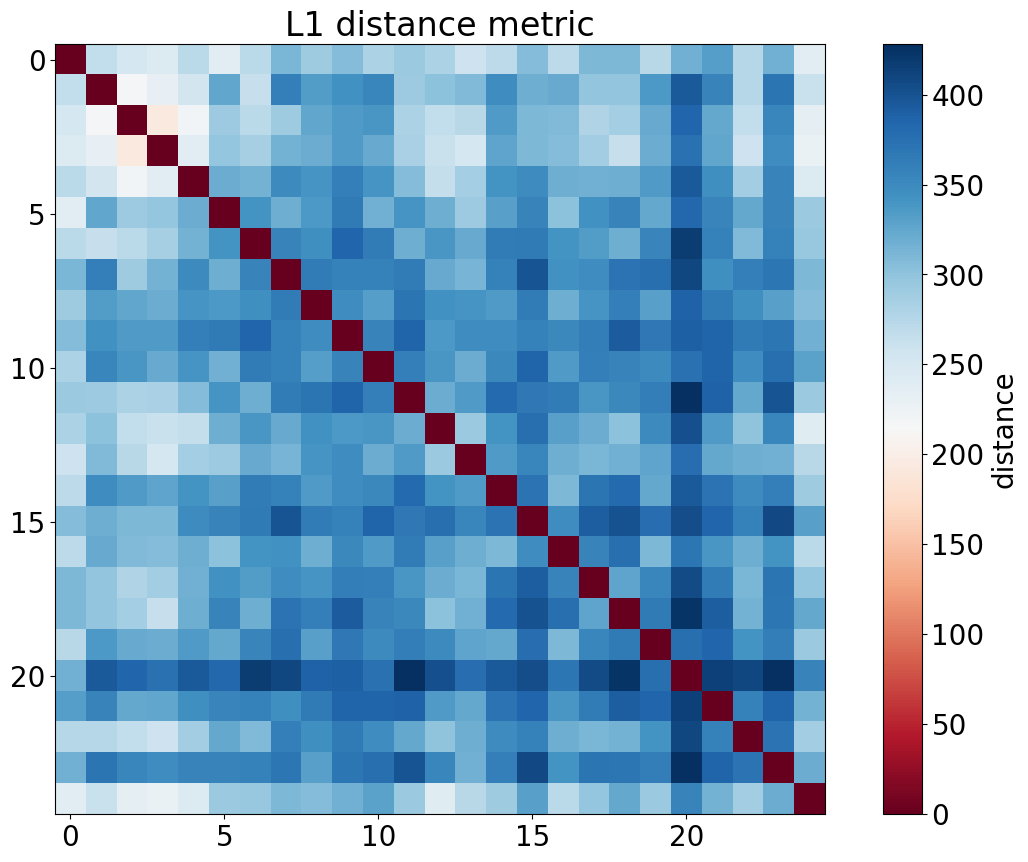

In [ ]:
plt.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=naive_distances),
         cmap="RdBu")
plt.title("difference time-stamp by time-stamp summed")
plt.colorbar(label = "distance")
plt.figure()

plt.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=l1),
         cmap="RdBu")
plt.title("L1 distance metric");
plt.colorbar(label = "distance")

Figure 3: The distances between sound bites computed with the naive approave (top) and the L1 distance (bottom), the absolute value of the naive approach. Distance scales are drawn to the right of each plot to indicate the magnitude of the difference between sound bites. In both plots, the diagonal represent comparisons of sound bites with themselves, and those comparisons are all 0, as is expected. In short, lighter colors are soundbites that are more similar to each other, whereas darker colors represent two very different soundbites. This process is different in the bottom plot where warmer colors represent similar soundbites.

In the top plot, patterns are hard to determine, as the colors appear to be all over the place. There appear to be a few dark red "bands" around bites 4, 7, and 13, indicating that all those soundbites are very different from each other, perhaps those 3 bites are unique in some way. The bottom plot is a lot easier to interpret, as most of the colors in it are very cool. The colors get cooler as we travel to the bottom-right corner of the plot, and are warmer on the opposite end. This indicates that there is greater dissimilarity between the higher-numbered soundbites.


# Pairwise time-stamps distance: each time series is a vector, so we can look at the timestamp-to-timestamp distance matrix

This is the object whose diagonal you summed over to get the naive distances and the L1 distances above.
For the full sample array this should be a 64000x64000 array. It is ok to calculate the distance and plot the stanradrized arrays, further downsampled by 10 (640x640 array)

use ```scipy.spatial.distance.cdist()``` and the L1 metric that was created earlier

## *task 2 comment on the following 2 figures*

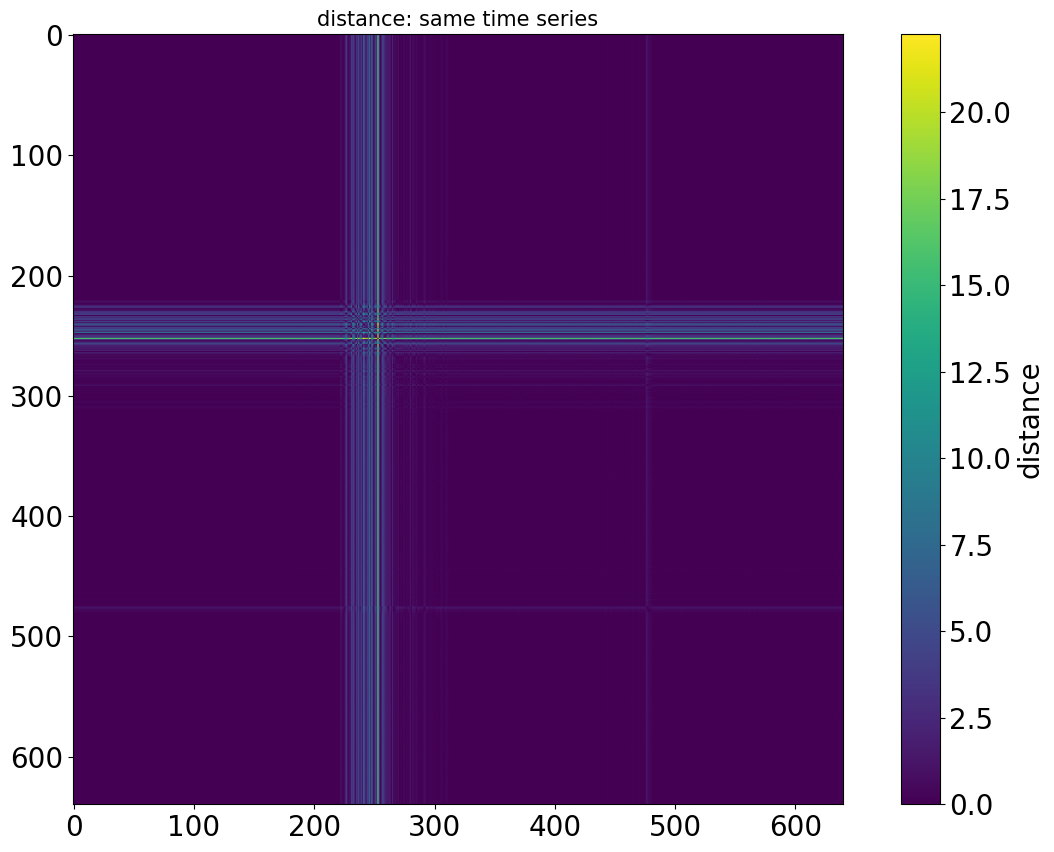

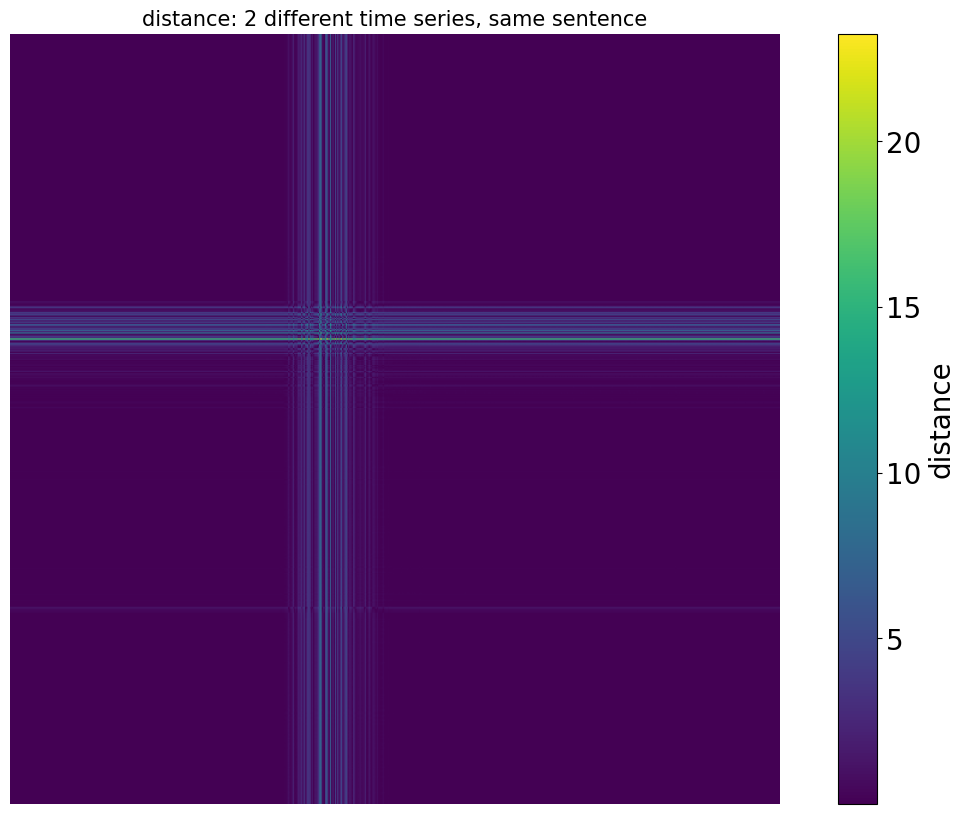

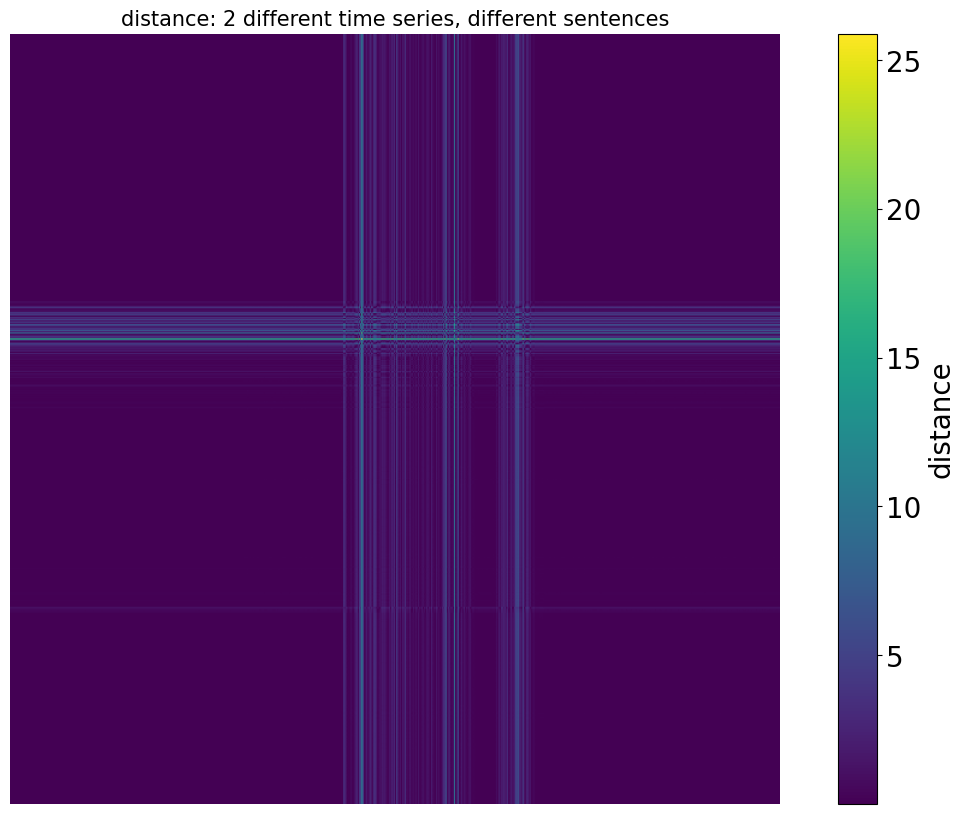

In [ ]:
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
pl.title("distance: same time series", fontsize=15)
#pl.axis('off')
pl.colorbar(label = "distance")
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.colorbar(label = "distance")
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');
pl.colorbar(label = "distance")


Figure 4: These are three distance matrices between a few time series. The first plot compares a time series with itself. The second plot compares two different series in which the same sentance is spoken. The last plot compares two different time series of different sentences.

The first plot displays mostly zero distances, with a notable cross of higher distances towards the left. Upon inspection, we see this sound bite contains the sentence at the beginning (which appears quiet) and then is silent for the rest of the recording. Thus, the cross pattern is likly the result of differences between the silent part of the recording and the short noisy part.

The second plot also displays a cross platter, although this one is slightly thicker than before. The plot features the same time series from before compared to another time series of the same sentence. If we plot both of these series, we can see that the second time series (X[2]) is spoken at a higher intensity at the beginning, before going silent for the rest of the time. The extra thickness in the lines could be the difference in intensity in the beginning of the sentence between the two time series. The remaining dark areas are the differences in the silences.

Lastly, the third plot features some more, thicker, crosses than before. This is to be expected as we are comparing two different time series of two different sentences. Plotting both of these series reveals that the second series (X[10]) varies much more in intensity throughout the whole time domain, and is rarely silent. So it makes sense that there would be many more differences between this series and X[1].

because it is very hard to tell whatis going on in the plots above let's replot with the color in logscale

<ipython-input-34-67cdca2669d9>:1: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,


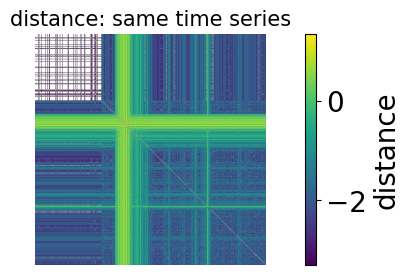

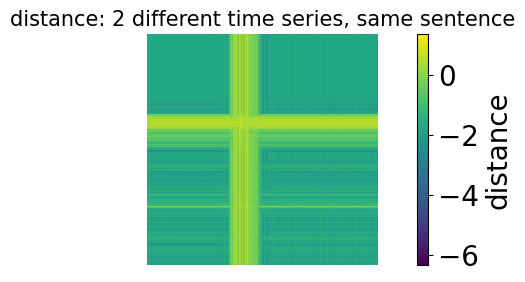

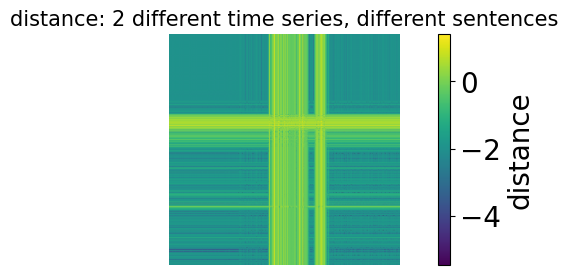

In [ ]:
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.colorbar(label = "distance")

pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.colorbar(label = "distance")

pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');
pl.colorbar(label = "distance")



Figure 5: These are the same plots from Figure 4, but with the colors in logscale. For the most part, the observations from Figure 4 remain the same in this case. The first plot of the time series compared with itself looks a little strange; there are a lot of white pixels. I believe this is due to the fact that many of the differences in the first plot are at or near zero, and taking the logarithm of them may be resulting in much larger negative difference, which may be what the white pixels represent.

## Computing the distance between all pixel pairs is also prohibitively slow. Do doit I further resampled the array by another factor of 10

<ipython-input-23-258e74e94c27>:7: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,


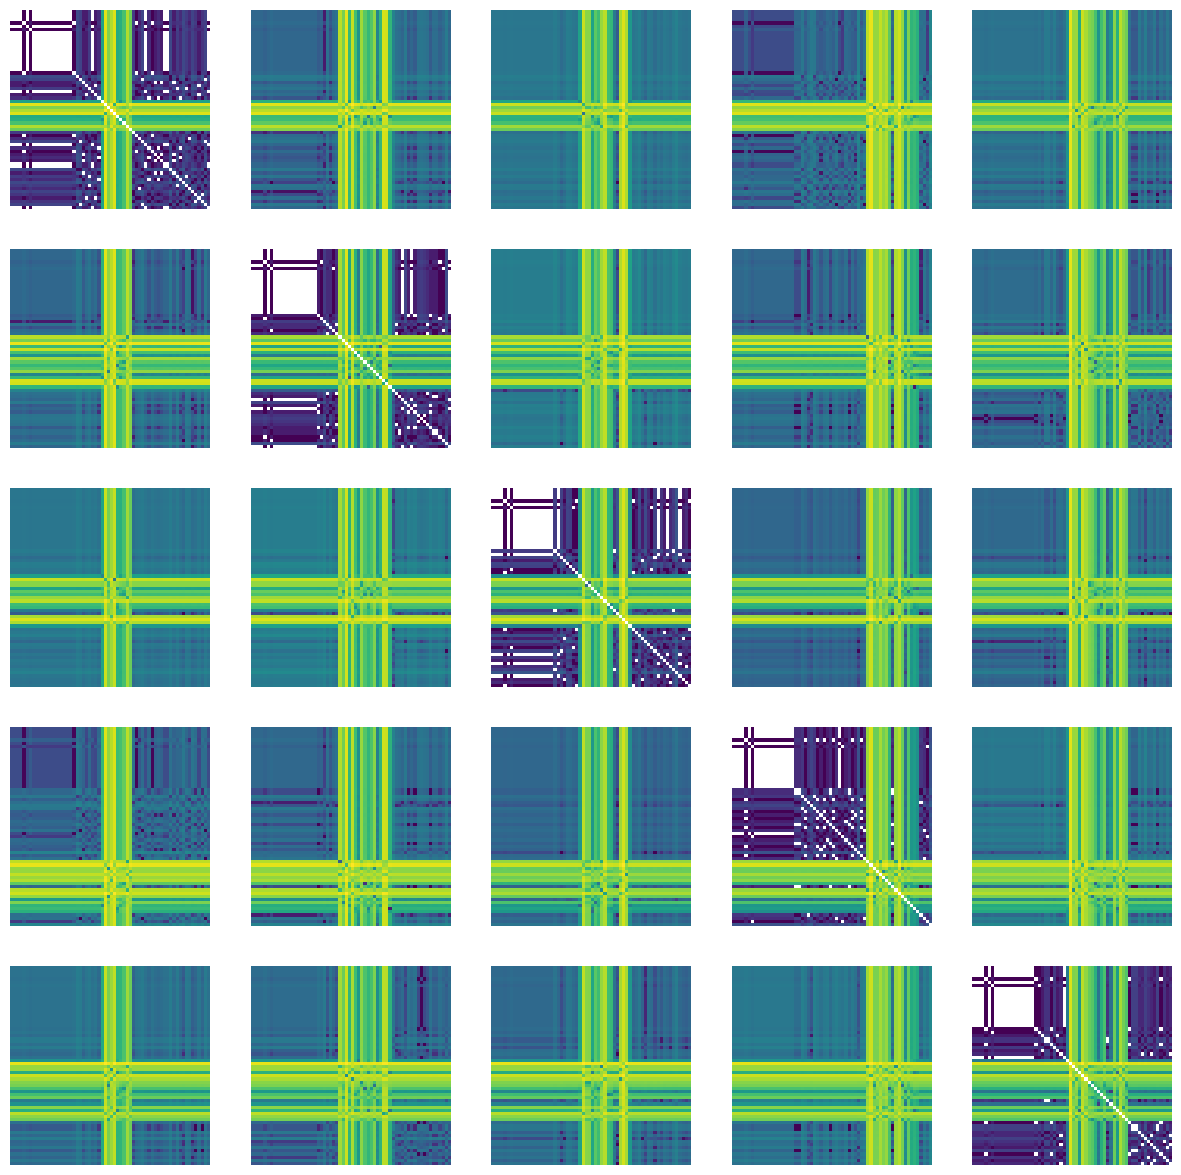

In [ ]:
restep = 100
fig = pl.figure(figsize(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,
                np.atleast_2d(X[j][::restep]).T,
          metric=(lambda x,y: np.abs(x - y)))))
        pl.axis('off');

Figure 6: same as figure 5 for all pairs of sound bites

# DTW distance
The DTW algorithm calculates the distance as the sum along a path in the  pair-wise distance matrix that minimized the distance between points, at the cost of increasing the length of the path. The simple Euclidean distance between 2 matrices would be the sum along the diagonal. In DTW this sum is modified to be the sum over the elements as follows:


$DTW(Q_i, C_j) = d(Q_i, C_j) + min(d(Q_{i-1}, C_{j-1}), d(Q_{i-1}, C_j), d(Q_i, C_{j-1})) $
Where $d$ is the distance between 2 time stamps: e.g. the absolute value of thedifference (L1)

The algorithm has the following rules:

- Every index from the first sequence must be matched with one or more indices from the other sequence and vice versa
- The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match)
- The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match)
- The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa, i.e. if j > i are indices from the first sequence, then there must not be two indices l > k in the other sequence, such that index i is matched with index l and index j is matched with index k , and vice versa

Remember that you will need to start with the L1 distance: at every step you will need to know the L1 distance for several surrounding cells. While you could calculate it on the spot it is more computationally efficient in python to calculate it for the whole array at once, as long as you can store the whole array in memory. Solving this with "dynamic coding", you can calculate all pair-wise distances first, storing the distance matrix, then find the path along the matrix and calculating the DTW distance by looking up values of the relevant cells. Pairwise L1 distance can be caluclated for the entire matrix with ```scipy.spatial.distance.cdist```

With that in mind, create a function that given x and y, two np.arrays of n and m elements respectively, returns
 - the DTW distance
 - the DTW distance matrix
 - the path along the matrix as x-y indices (look in the slides if you need help with this one: I added the code in there)

Make sure your function called *dtw()* and make sure that it has a "docstring' that complies to PEP conventions https://www.python.org/dev/peps/pep-0257/



Run your function for the soundbite arrays using every 100th datapoint and plot the array and the path along the array
 - for the first normalized sound array matched with itself
 - for the first normalized sound array matched with another normalized sound array of the same phrase:  soundbites are the same sentence 5 by 5: 0-4 same sentence, 5-9, 10-14, 15-19, 19-20
 - for the first unnormalized sound array matched with another unnormalized sound array, the same one as in the previous step
 - any two other normalized arrays, not the same sentence.

What is the path for the first array you plotted? Why?

## *task 3: write on your own the DTW algorithm. Use the rules above and the pseudocode and equations in the slides*

## *Extra Credit: code the DTW with a parameter r tha allows to search farther than one step away from the diagonal. Make that r an input to your dtw() function*

In [ ]:

def path(DTWm):
  # the path can be calculated backword or forward
  # I find bacward more intuitive
  # start at one to the last cell:
  i, j = np.array(DTWm.shape) - 2

  #since I do not know how long the path is i will use lists
  # p and q will be the list of indices of the path element along the 2 array axes
  p, q = [i], [j]
  # go all the way to cell 0,0
  while (i > 0) or (j > 0):
      	# pick minimum of 3 surrounding elements:
      	# the diagonal and the 2 surrounding it
        tb = argmin((DTWm[i, j], DTWm[i, j+1], DTWm[i+1, j]))
        #stay on the diagonal
        if tb == 0:
            i -= 1
            j -= 1
        #off diagonal choices: move only up or sideways
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        # put i and the j indexx into p and q pushing existing entries forward
        p.insert(0, i)
        q.insert(0, j)
  return array(p), array(q)



## code steps:
- Calculate the distance matrix according to L1
- Set the 0,0 cell to 0
- for all values of the index i; for all values of the index j

  set the DTW[i,j] cell to $L1 + min(l1(Q_{i-1}, C_{j-1}), L1(Q_{i-1}, C_j), L1(Q_i, C_{j-1}))$

- calculate the DTW path
- return the value of the last cell (DTW[-1,-1])  the DTW array, the path

note: you will likely have to have a nested loop but there are extra points if yuo can figure out how to write it without a nested loop (for i...: for j....:)

In [ ]:
pl.imshow?

dtw distance:  0.0


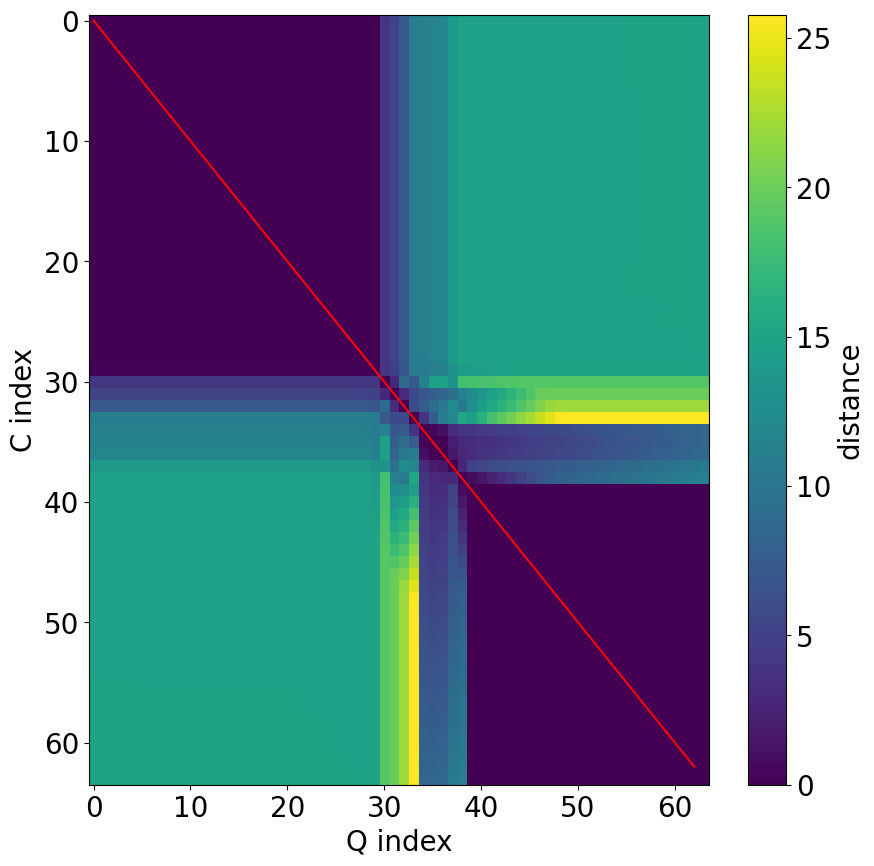

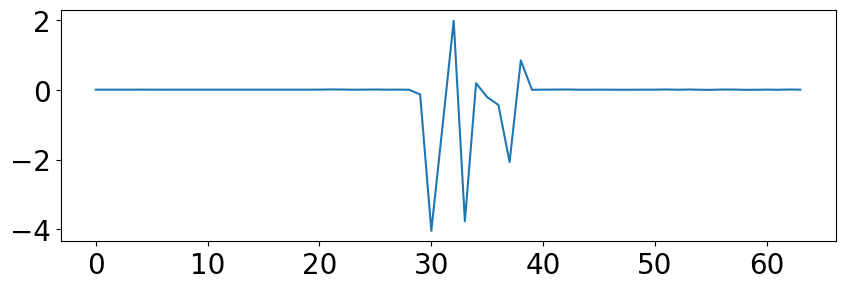

In [ ]:
def dtw(Q,C, show=False, getpath=True):
  '''
  Calculates the DTW distance, and matrix, and path.
  Inputs:
    Q: first time series size: n x m
    C: second time series size: n x m
    show: If true, displays DTW distance and DTW path as a heatmap
    getpath: If true, calculates the DTW path and returns it
  Outputs:
    dTW_distance (float): the DTW distance. This will be the dTW(n,m).
    dTW (np.ndarray): the DTW distance matrix
    dTW_path (tuple): the DTW path as a tuple of indices
  '''


  #Step 1: Construct the distance matrix. Use the l1 distance
  dMat = cdist(np.atleast_2d(Q).T, np.atleast_2d(C).T, metric = l1)

  #Step 2: begin creating the DTW matrix
  DTW = np.zeros((Q.shape[0], C.shape[0]))
  DTW[0,0] = dMat[0,0]

  #Initialize boundary conditions (What the first row and column are)
  for i in range(1, Q.shape[0]):
    DTW[i,0] = dMat[i,0] + DTW[i-1,0]
  for j in range(1, C.shape[0]):
    DTW[0,j] = dMat[0,j] + DTW[0,j-1]


  for i in range(1, Q.shape[0]):
    for j in range(1, C.shape[0]):

      DTW[i,j] = dMat[i,j] + np.min((DTW[i-1,j], DTW[i,j-1], DTW[i-1,j-1]))


  #Step 3: Get the DTW distance
  dTW_distance = DTW[-1,-1]

  #Step 4: Get the DTW path
  if getpath:
    dTW_path = path(DTW)
    p,q = dTW_path
  else:
    dTW_path = None
    p,q = None, None

  #Step 5: plot the DTW matrix as a heatmap
  if show:
    #Plot the DTW matrix and path
    pl.figure(figsize(10,10))
    pl.imshow(DTW, origin = "upper", cmap = "viridis", aspect='auto')
    pl.xlabel("Q index")
    pl.ylabel("C index")
    pl.plot(p,q, color = "red")
    pl.colorbar(label = "distance")



  return dTW_distance, DTW, dTW_path




# DTW distance to itslef
print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], show=True)[0]);
pl.figure(figsize(10,3))
pl.plot(X[0][::restep]);

Figure 7: The DTW heatmap matrix (top) and the time series itself (bottom) downsampled by a factor of 100. The DTW path is plotted over the matrix. Since the path is a straight line along the diagonal, this tells us that the two sound bites are identical (which we know already). The colors of the heatmap correspond with where we'd expect the differences to be zero and non-zero as well. This tells us that our algorithm is correct.

dtw distance:  13.367738084679551


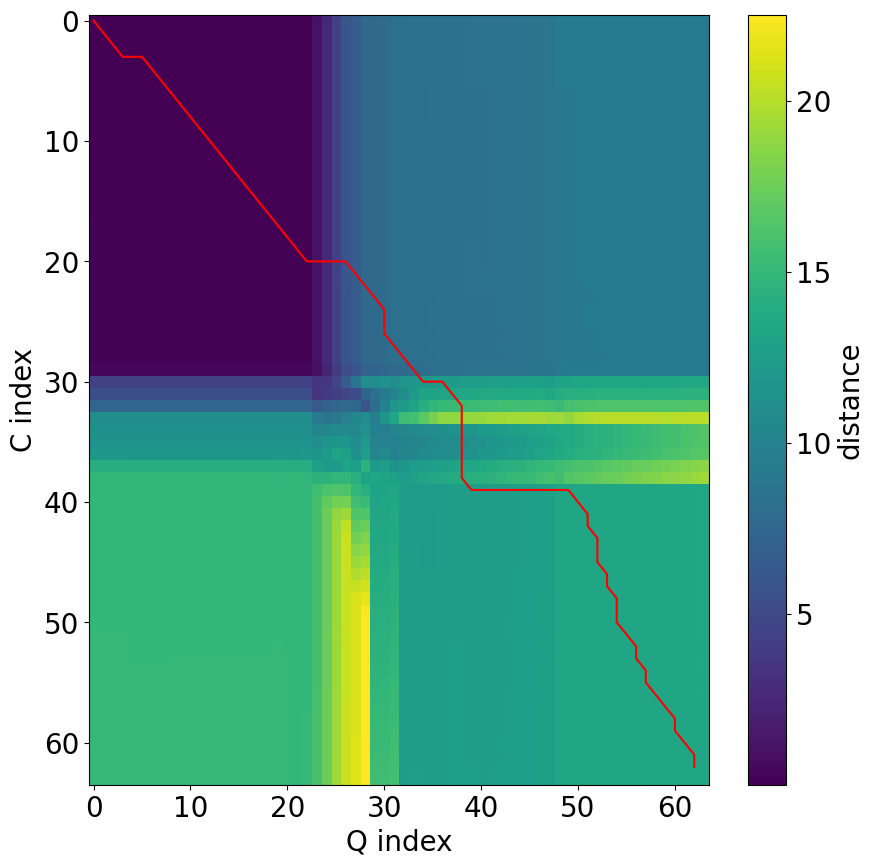

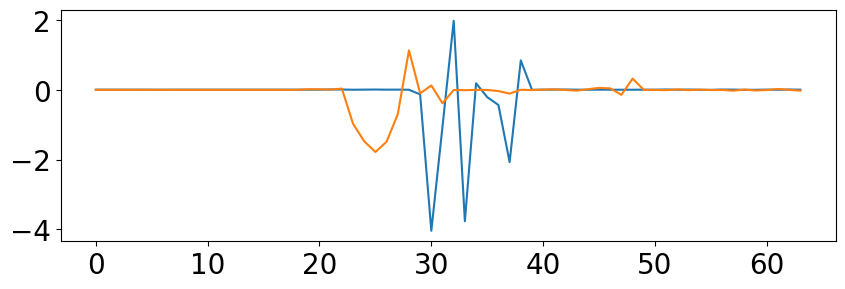

In [ ]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(X[0][::restep])
pl.plot(X[1][::restep]);

Figure 8: The DTW heatmap matrix (top) and the time series  (bottom) downsampled by a factor of 100. This is a comparison of the first two normalized sound bites. The DTW path is plotted over the matrix. The DTW path continues a downward diagonal trend, until it exhibits horizontal and vertical changes around the middle of the heatmap. These differences are accuratly reflected in the time series plots below.

dtw distance:  18552.0


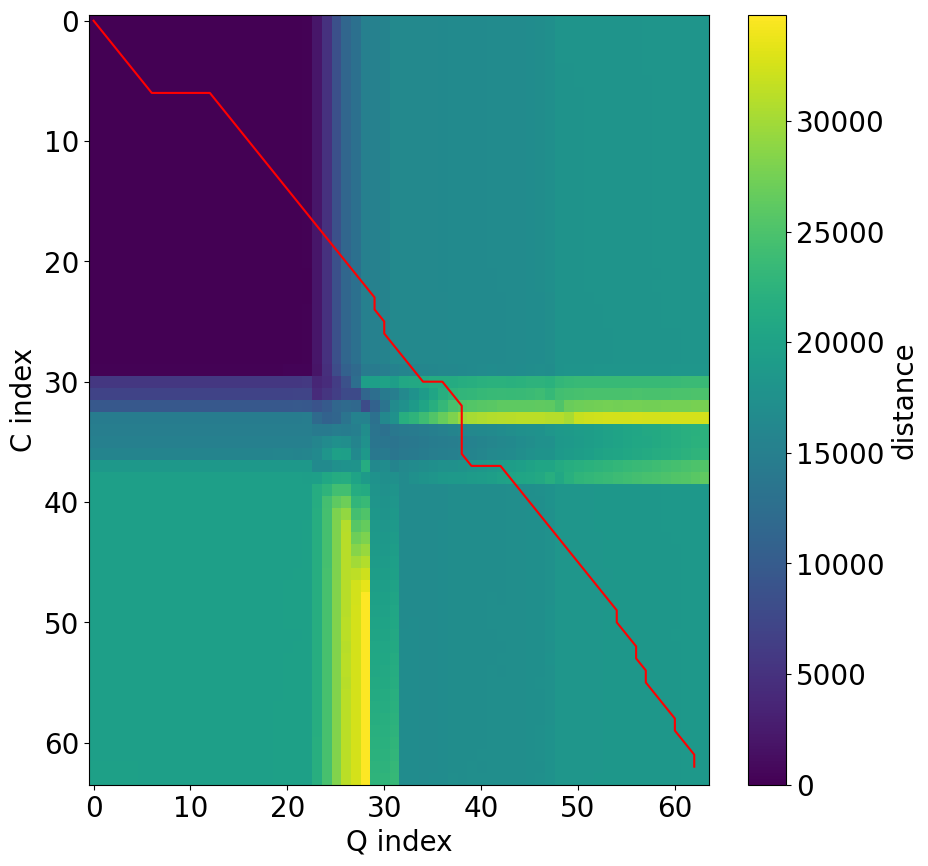

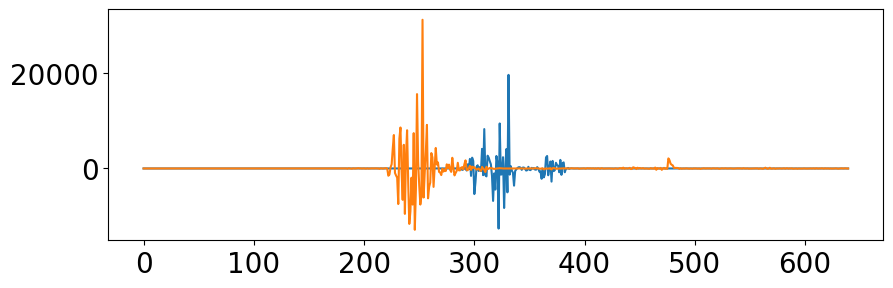

In [ ]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(wavfiles[0][::steps*restep], wavfiles[1][::steps*restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);

Figure 9: The DTW heatmap matrix (top) and the time series  (bottom) downsampled by a factor of 100. This is a comparison of the first two original sound bites. The DTW path is plotted over the matrix. The DTW path continues a downward diagonal trend, and exhibits a few changes indicating that there are som differences between these time series, but not many. These series are certainly more similar to each other than in the previous case.

dtw distance:  12.125746133323698


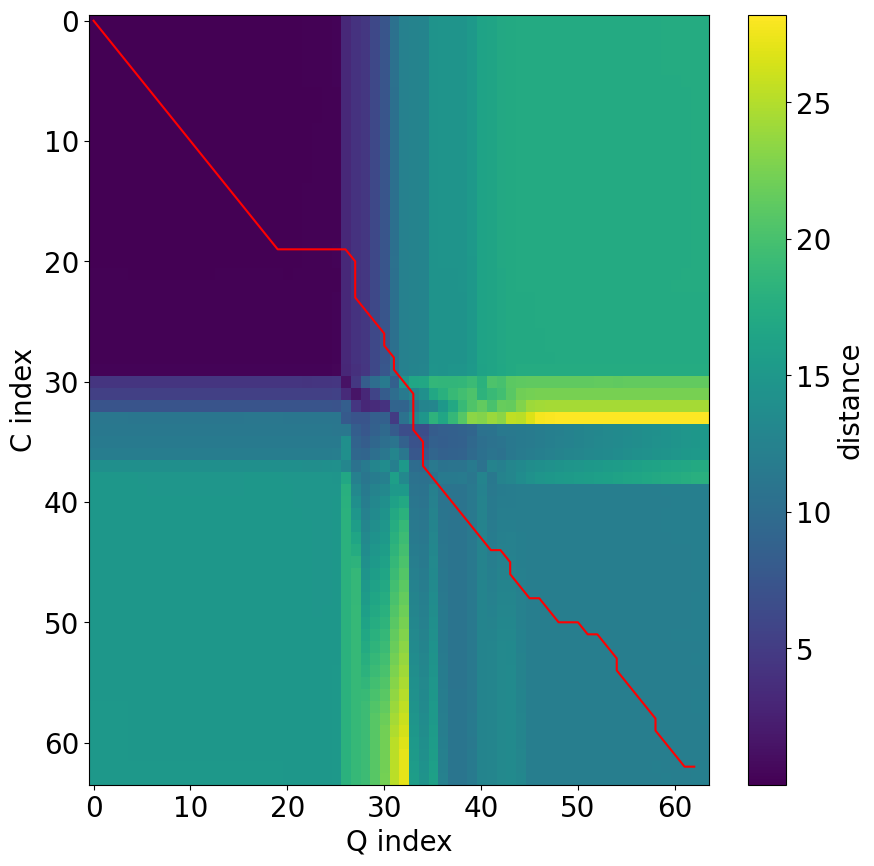

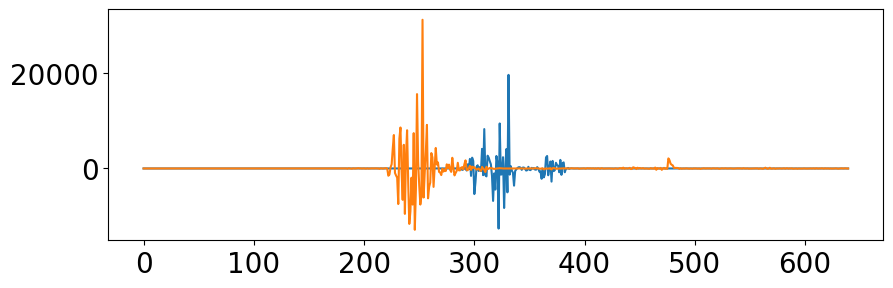

In [ ]:
# DTW distance to a file with a different sound bite
print("dtw distance: ", dtw(X[0][::restep], X[24][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);

Figure 10: The DTW heatmap matrix (top) and the time series  (bottom) downsampled by a factor of 100. This is a comparison of the first and the 25th normalized sound bites. The DTW path is plotted over the matrix. The DTW path continues a downward diagonal trend, exhibits a horizontal change followed by some vertical ones. This indicates that one time series changes a lot while the other one remains constant at the same time stamp. Examining the time series plot below confirms this interpretation.

# 2 What is the nearest neighbor of the first sound bite?

In [ ]:
# what is most similar to the first time series? (other than itself)
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distances[i], _, _ = dtw(X[0][::restep], X[i][::restep]);


0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [ ]:

distances.argsort()

array([ 0,  6, 24, 13, 15,  8,  3,  2,  1, 18,  7,  5,  4, 14,  9, 22, 17,
       16, 10, 11, 19, 21, 20, 12, 23])

In [ ]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[0]])

Based on its nearest neighbor the first sound bite says...
Tofftl


## *task 4: Classify the 20th sound bite based on its nearest neighor with Euclidean and DTW distance*

In [ ]:
# what is most similar to the first time series? (other than itself)
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);



0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [ ]:
distancesE.argsort()

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7])

In [ ]:
y[19]

np.str_('Tontt')

In [ ]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(y[distancesE.argsort()[0]])
print("Correct!") if y[distancesE.argsort()[0]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
Tontt
Correct!


In [ ]:
# what is most similar to the first time series? (other than itself)
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::steps], X[i][::steps], getpath=False)[0];

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [ ]:
distancesDTW.argsort()

array([19,  9,  2,  0, 24,  3,  4,  1, 15, 13, 11, 22, 16,  5,  6, 17, 12,
       14,  8, 18, 23, 10,  7, 21, 20])

In [ ]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[0]])
print("Correct!") if y[distancesDTW.argsort()[0]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Tontt
Correct!
